# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression



## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [2]:
df=pd.read_csv("C:/Users/New User/Python/nit/demos/data/insurance.csv")
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [3]:
df.isnull().sum()
df.duplicated().sum()

np.int64(1)

## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


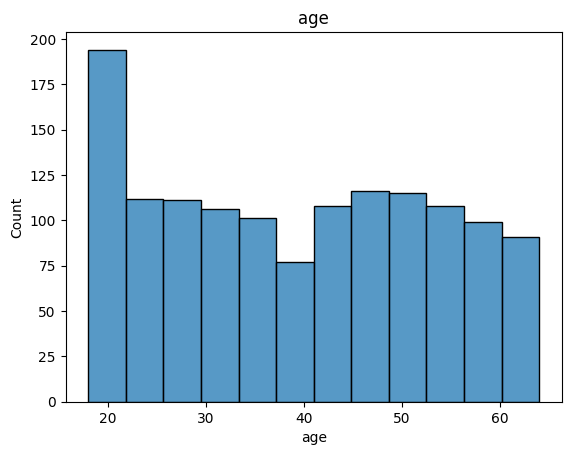

In [4]:
#Univaraite Analysis for age column 
sns.histplot(x='age',data=df)
plt.title("age")
plt.show()

# People belonging to Age group 20 are more in count than others in dataset

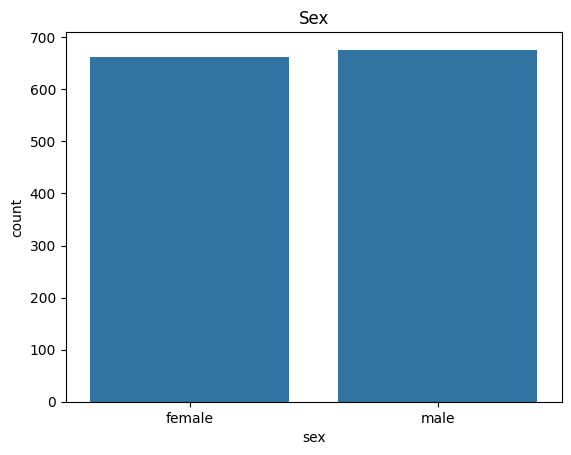

sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64

In [5]:
#Univaraite analysis with respect to sex
sns.countplot(x='sex',data=df)
plt.title("Sex")
plt.show()

df['sex'].value_counts(normalize=True).mul(100)

#Proportion of male and female count is approximately same 

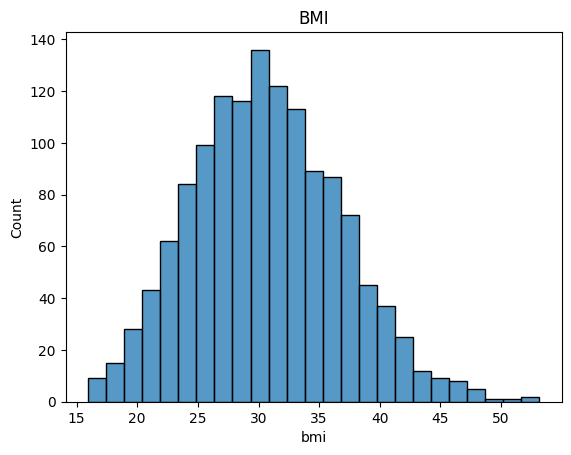

In [6]:
#Univaraite Analysis with respect to BMI
sns.histplot(x='bmi',data=df)
plt.title("BMI")
plt.show()

#Curve seems to be linear regression with highest peak at 30 BMI

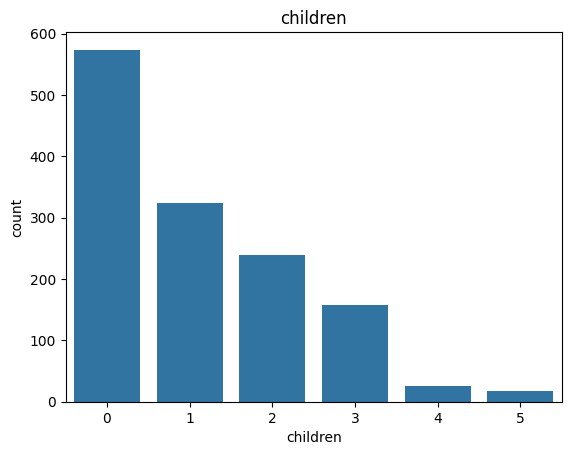

children
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: proportion, dtype: float64

In [7]:
#Univaraite Analysis with respect to children 
sns.countplot(data=df,x='children')
plt.title("children")
plt.show()

df['children'].value_counts(normalize=True).mul(100)
#People with 0 children are more around 42%

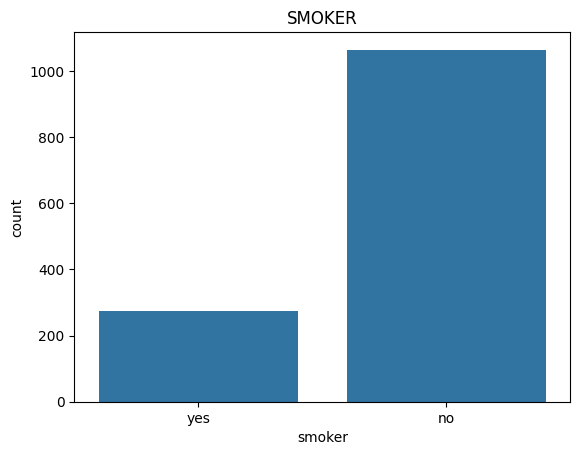

smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64

In [8]:
#Univaraite Analysis with respect to smoker flag
sns.countplot(data=df,x='smoker')
plt.title("SMOKER")
plt.show()

df['smoker'].value_counts(normalize=True).mul(100)
#People who are not smokers(79%) are more than smokers(20%)

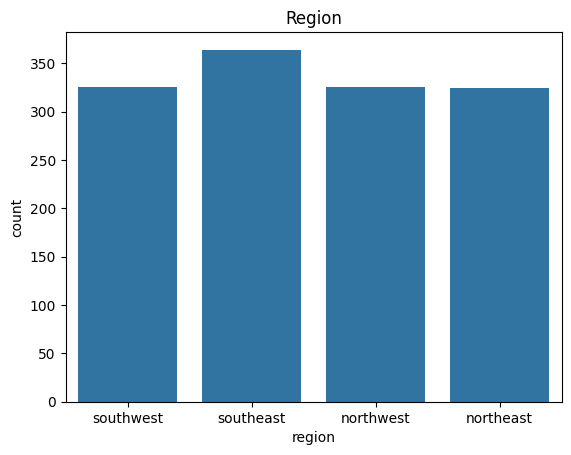

region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: proportion, dtype: float64

In [9]:
#Univaraite Analysis with respect to region
sns.countplot(data=df,x='region')
plt.title("Region")
plt.show()

df['region'].value_counts(normalize=True).mul(100)
#People who belong to south east are more and rest all regions are same

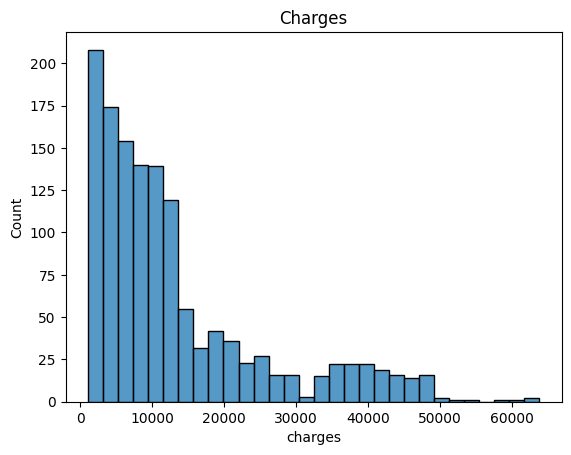

In [10]:
#Univaraite Analysis with respect to insurance value
sns.histplot(data=df,x='charges')
plt.title("Charges")
plt.show()


#People paying less insurance are more than people paying high insurance

### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

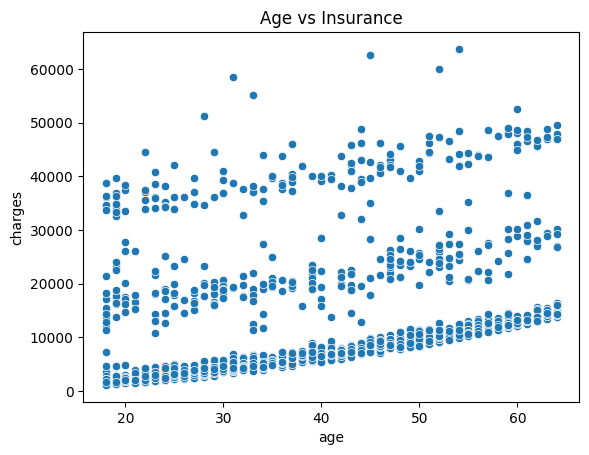

In [11]:
# Bivaraite Analysis
# Age versus insurance charges
sns.scatterplot(x='age',y='charges',data=df)
plt.title("Age vs Insurance")
plt.show()

# As age is increasing the minimum insurance paying is more
# Max insurance amount is paid ariun age between 40 to 55


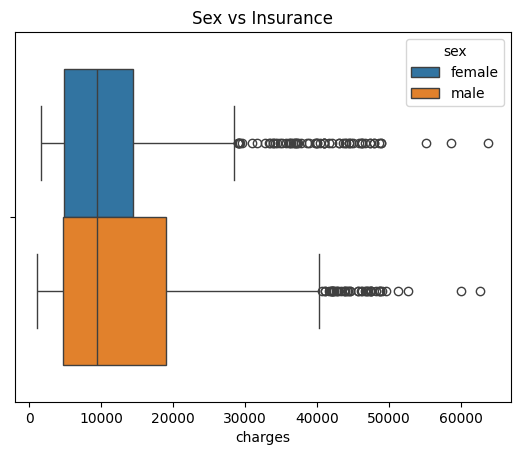

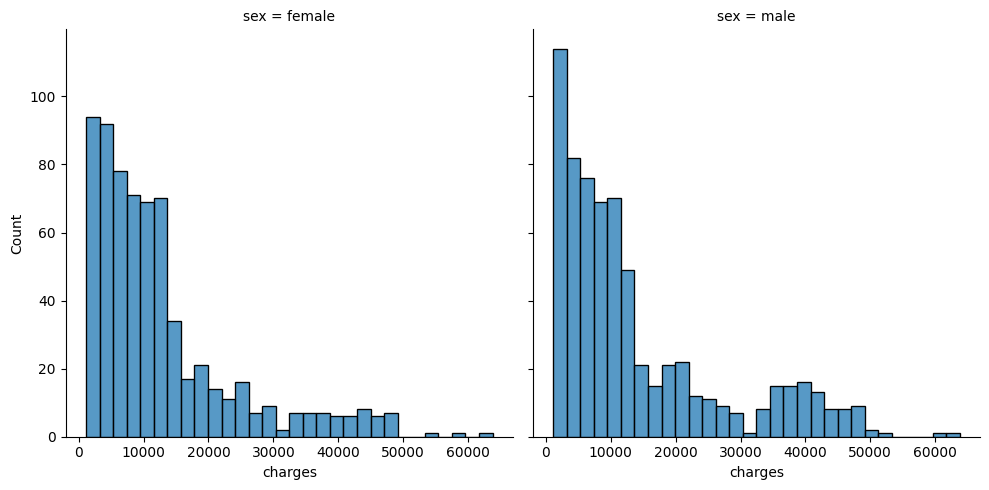

In [12]:
# Bivaraite Analysis
# Age versus sex
sns.boxplot(hue='sex',x='charges',data=df)
plt.title("Sex vs Insurance")
plt.show()

sns.displot(x='charges',col='sex',data=df)
plt.show()

# Male people are paying more insurance when compared to female... There are outliers in both male and female

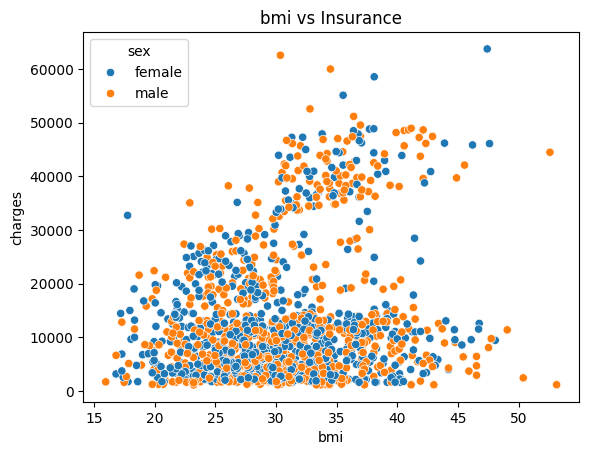

In [13]:
# Bivaraite Analysis
# BMI versus Insurance
sns.scatterplot(x='bmi',y='charges', hue='sex',data=df)
plt.title("bmi vs Insurance")
plt.show()

# With respect to BMI also we are seeing more insurance to be paid by male than female


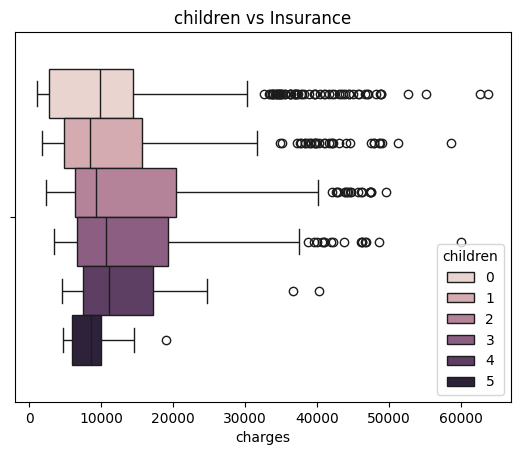

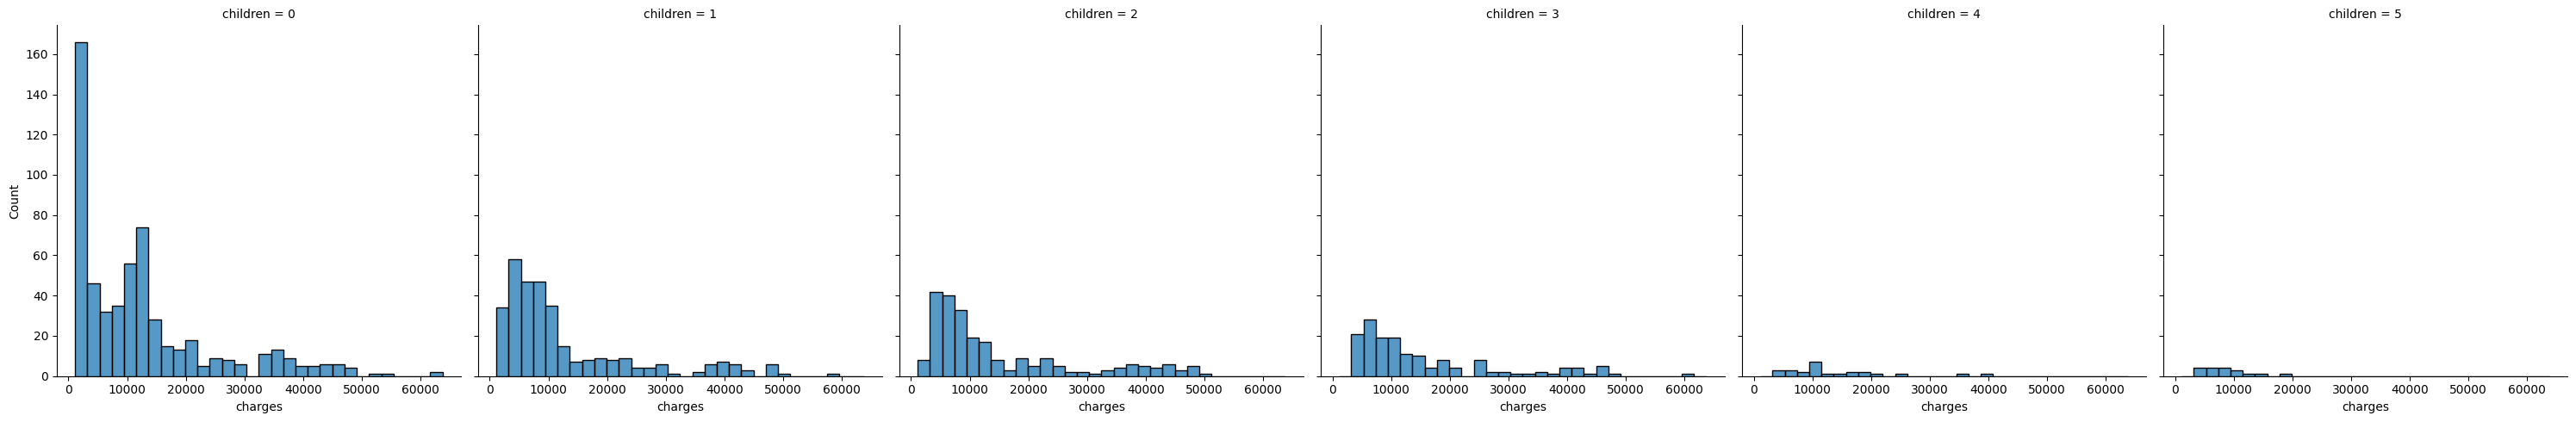

In [14]:
# Bivaraite Analysis
# Children versus Inusrance
sns.boxplot(hue='children',x='charges',data=df)
plt.title("children vs Insurance")
plt.show()

sns.displot(x='charges',col='children',data=df)
plt.show()

# People with zero children are paying more insurance and people with more children around 4 or 5 are paying very less insurance


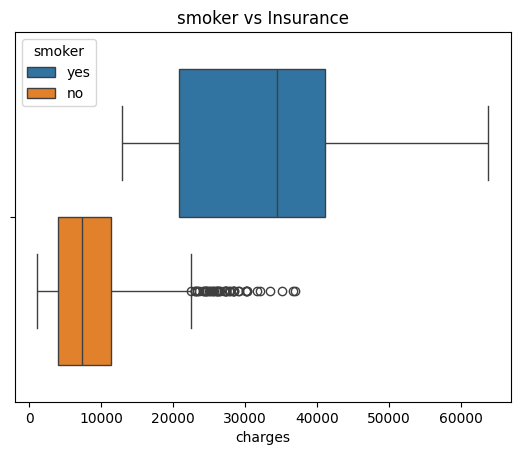

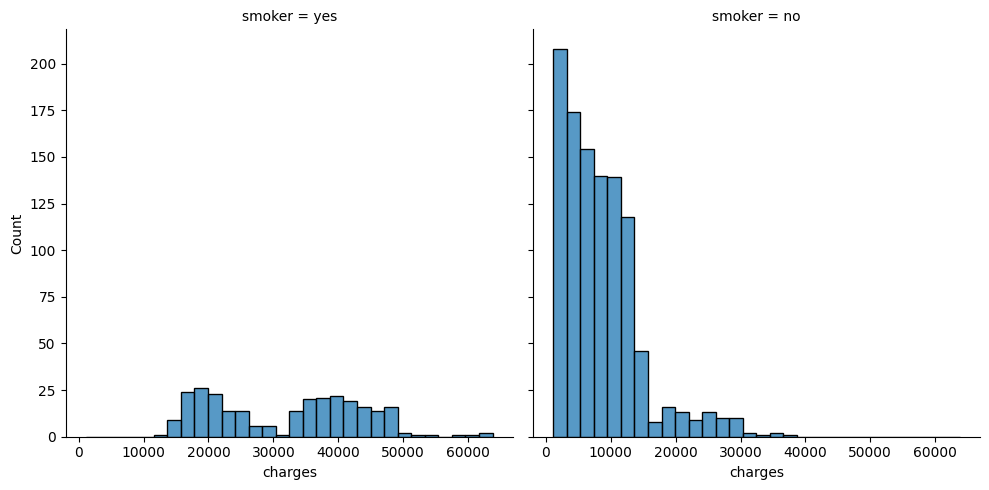

In [15]:
# Bivaraite Analysis
# smoker versus Inusrance
sns.boxplot(hue='smoker',x='charges',data=df)
plt.title("smoker vs Insurance")
plt.show()

sns.displot(x='charges',col='smoker',data=df)
plt.show()

# High amount of insurance is paid by smokers than normal people(15k to 60k)

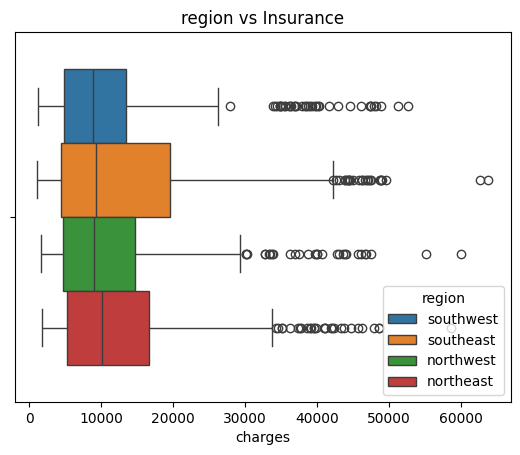

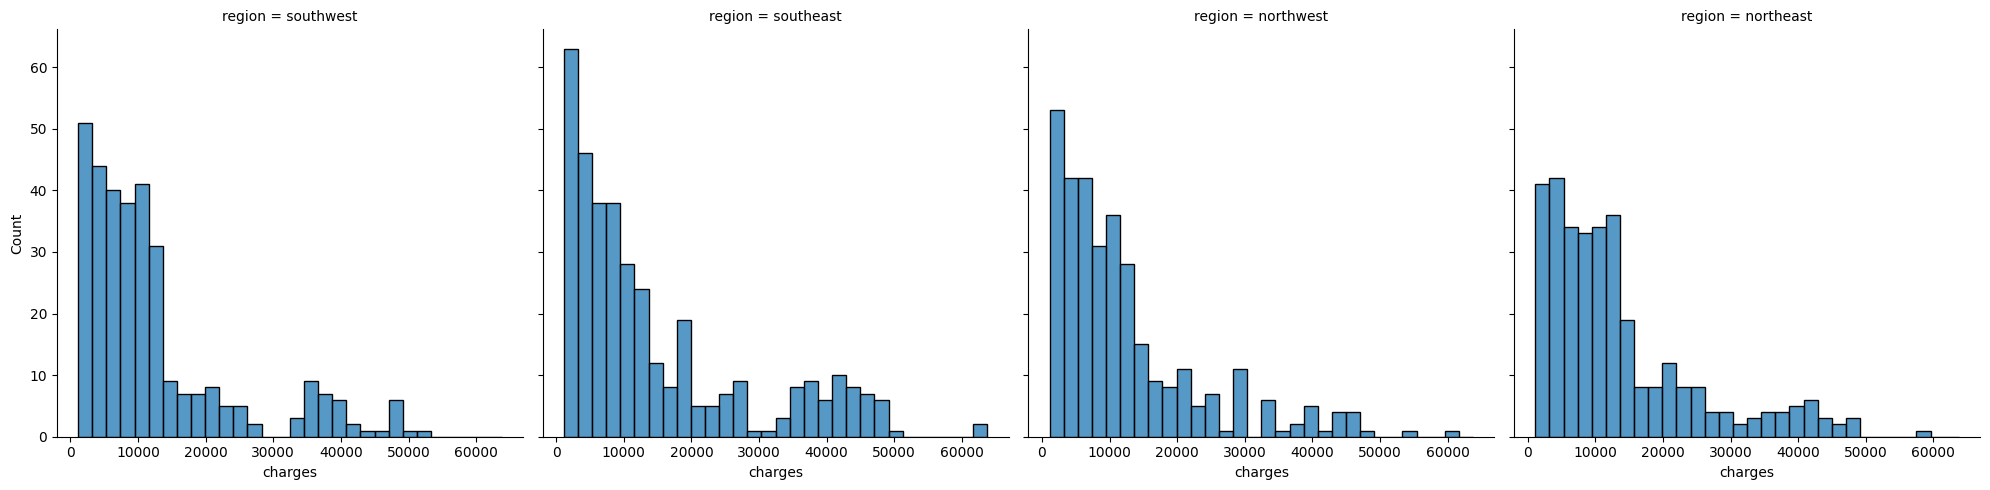

In [16]:
# Bivaraite Analysis
# region versus Inusrance
sns.boxplot(hue='region',x='charges',data=df)
plt.title("region vs Insurance")
plt.show()

sns.displot(x='charges',col='region',data=df)
plt.show()

# People belonging to south east are paying more insurance when compared to other regions

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

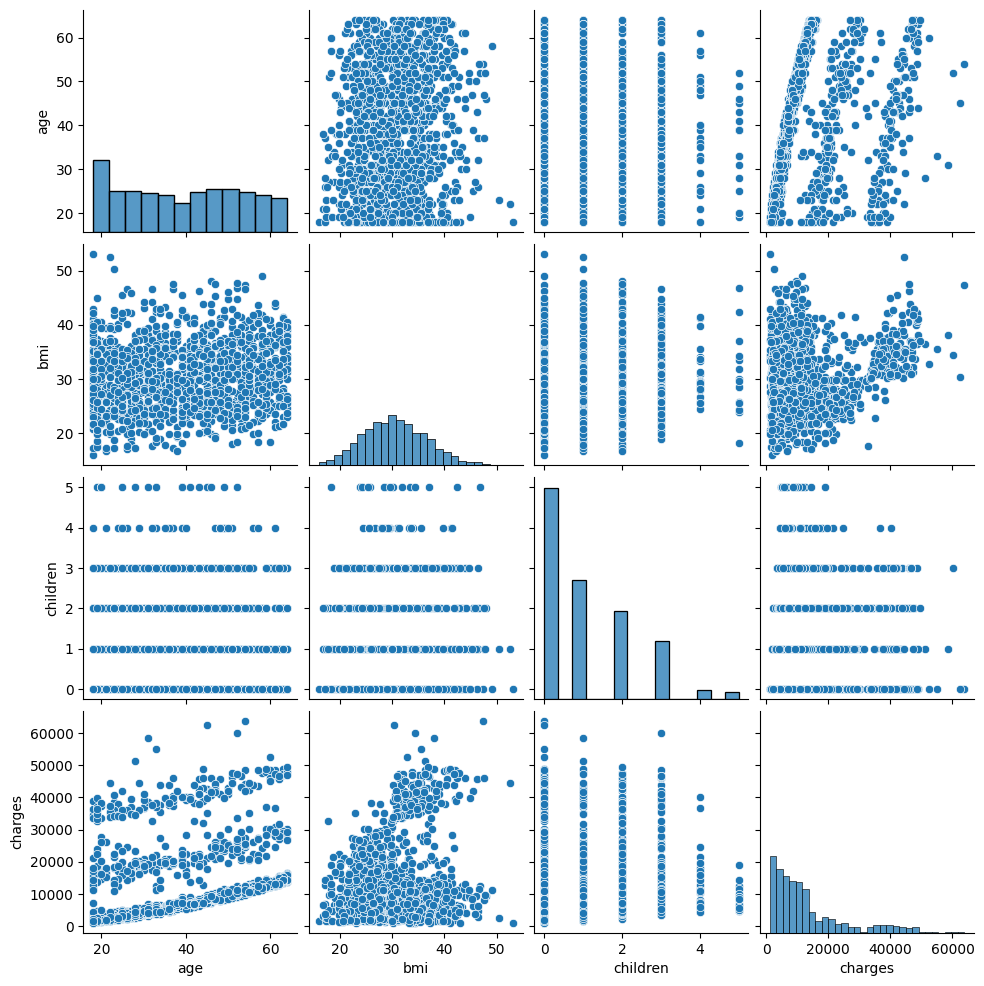

In [17]:
sns.pairplot(data=df)

### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

<Axes: >

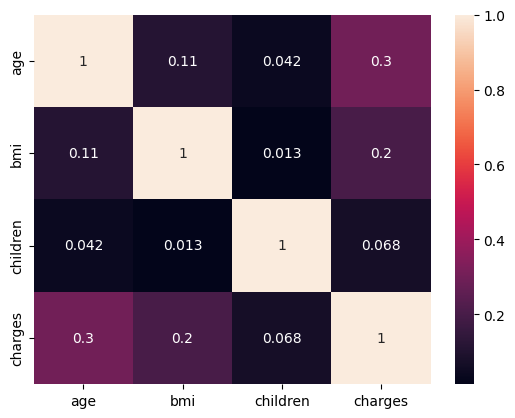

In [18]:
num_col=df.drop(columns=['sex','region','smoker'])
sns.heatmap(num_col.corr(),annot=True)

# Correlation seems to be very less... Among that age and charges ar correlated around 0.3

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [19]:
X=df[['age','bmi','children',]]
y=df['charges']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [20]:
model=LinearRegression()
model.fit(X_train,y_train)
coeff = model.coef_
intercept=model.intercept_
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [21]:
mse_test = mean_squared_error(y_test,y_test_predict)
mae_test = mean_absolute_error(y_test,y_test_predict)
rmse_test=np.sqrt(mse_test)
r_squared_test=r2_score(y_test,y_test_predict)
score_test = model.score(X_test,y_test)

mse_train = mean_squared_error(y_train,y_train_predict)
mae_train = mean_absolute_error(y_train,y_train_predict)
rmse_train=np.sqrt(mse_train)
r_squared_train=r2_score(y_train,y_train_predict)
score_train = model.score(X_train,y_train)

print("training data")
print(f"Mean square error is {mse_train}")
print(f"Mean Absolute error is {mae_train}")
print(f"Root Mean Squared error is {rmse_train}")
print(f"R squared error is {r_squared_train}")
print(f"Model Score is {score_train}")

print("testing data")
print(f"Mean square error is {mse_test}")
print(f"Mean Absolute error is {mae_test}")
print(f"Root Mean Squared error is {rmse_test}")
print(f"R squared error is {r_squared_test}")
print(f"Model Score is {score_test}")

training data
Mean square error is 127997511.1703143
Mean Absolute error is 8918.842049724704
Root Mean Squared error is 11313.598506678338
R squared error is 0.12408554006005057
Model Score is 0.12408554006005057
testing data
Mean square error is 131396021.71858346
Mean Absolute error is 8963.430998233436
Root Mean Squared error is 11462.810376106876
R squared error is 0.10669053781149407
Model Score is 0.10669053781149407


### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

In [22]:
# Mean Absolute Error is less than mean square error. 
# Model Score or R squared error is too low it seems to be not a good model to predict


## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

In [23]:
# High amount of insurance is paid by smokers than normal people(15k to 60k)
# People belonging to south east are paying more insurance when compared to other regions
#Male people are paying more insurance than female

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

In [24]:
#R square or model score that determines accuracy is very low

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 60**

---